## Checking out the examples:

### example_basic.py
Basic usage and application of DeepScan


In [29]:
from deepscan import remote_data
from deepscan.deepscan import DeepScan
from deepscan import geometry

data = remote_data.get() # or load data as 2d numpy array
result = DeepScan(data) # outputs dictionary 

result

skymap: measuring sky...
-Performing interpolation.
skymap: finished after 2 seconds.
dbscan: performing clustering...
-threshold applied in 0 seconds
-corepoints obtained in 0 seconds
-dilated segments obtained in 0 seconds.
-segments labeled in 0 seconds.
-segmap eroded in 0 seconds
dbscan: finished after 0 seconds.
deblend: deblending...
-Final number of segments: 703
deblend: finished after 0 seconds.
makecat: performing measurements...
makecat: finished after 0 seconds.


{'df':         a_rms     b_rms     theta         q        xcen        ycen    segID  \
 0    1.897703  1.519773  1.951655  0.800849   82.343967    6.447848      1.0   
 1    2.020418  1.834648  2.145269  0.908054  856.675271    3.825863      2.0   
 2    3.158685  1.341275  1.635467  0.424631  909.647064    1.414895      3.0   
 3    3.658125  3.002542  1.714814  0.820787  989.080131   11.804834      4.0   
 4    2.799848  1.842732  2.384609  0.658155  187.801772    9.429806      5.0   
 ..        ...       ...       ...       ...         ...         ...      ...   
 698  6.198417  3.632914  3.090971  0.586104  565.624811  478.996520  18448.0   
 699  2.933131  2.520479 -2.517152  0.859313   43.207423  602.357239  19313.0   
 700  3.013572  2.560954 -2.117735  0.849807  232.073151  765.490315  19537.0   
 701  1.254640  0.879749  2.448812  0.701196  904.419625  940.121518  20179.0   
 702  2.091097  1.040789  2.763077  0.497724  393.499116  987.155593  20283.0   
 
            flux   a

In [30]:
result['df']
# info about each source that was detected

,a_rms,b_rms,theta,q,xcen,ycen,segID,flux,area,I50,I50av,R50,parentID
0,1.897703,1.519773,1.951655,0.800849,82.343967,6.447848,1.0,79.797215,77.0,1.842030,2.711432,2.185097,0.0
1,2.020418,1.834648,2.145269,0.908054,856.675271,3.825863,2.0,53.035577,72.0,1.275444,1.632169,2.326213,0.0
2,3.158685,1.341275,1.635467,0.424631,909.647064,1.414895,3.0,37.153768,59.0,1.048475,1.450069,2.034214,0.0
3,3.658125,3.002542,1.714814,0.820787,989.080131,11.804834,4.0,451.122663,282.0,3.405378,5.811162,3.523363,0.0
4,2.799848,1.842732,2.384609,0.658155,187.801772,9.429806,5.0,38.892727,66.0,1.013751,1.394908,2.111004,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,6.198417,3.632914,3.090971,0.586104,565.624811,478.996520,18448.0,305.654458,321.0,1.266492,1.872879,5.108954,8955.0
699,2.933131,2.520479,-2.517152,0.859313,43.207423,602.357239,19313.0,98.426467,132.0,1.305555,1.736878,3.038254,11470.0
700,3.013572,2.560954,-2.117735,0.849807,232.073151,765.490315,19537.0,144.486238,162.0,1.752654,2.590632,2.985411,12759.0
701,1.254640,0.879749,2.448812,0.701196,904.419625,940.121518,20179.0,19.627609,42.0,1.173917,1.426801,1.492705,15153.0


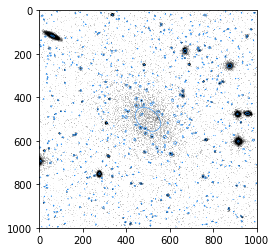

In [31]:

fig, ax = plt.subplots()
ax.imshow(np.arcsinh(data), cmap="binary", vmin=0.5, vmax=3)

for i in range(result['df'].shape[0]): # for each item in the DataFrame
    s = result['df'].iloc[i] # gets i-th line of the result DataFrame
    E = geometry.Ellipse(x0=s['xcen'], y0=s['ycen'], a=s['R50'], q=s['q'],
                         theta=s['theta'])
    E.draw(color='dodgerblue', linewidth=0.5, ax=ax)

#Format
ax.set_xlim(0, data.shape[1])
ax.set_ylim(data.shape[0], 0)

plt.show()

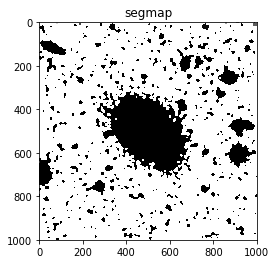

In [37]:
fig, ax = plt.subplots()

ax.imshow(np.arcsinh(result['segmap']), cmap="binary", vmin=0.5, vmax=3)
ax.set_xlim(0, data.shape[1])
ax.set_ylim(data.shape[0], 0)

plt.title("segmap")
plt.show()

### example_skymap.py

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from deepscan import skymap, sextractor, dbscan, SB, geometry, remote_data

ps = 0.186 # arcsec per pixel
mzero = 30 # magnitude zero point

In [4]:
data = remote_data.get()
print(data)
data.shape 

[[ 9.1461055e-03  4.9677747e-01  8.6773738e-02 ...  1.6179307e-01
   4.6683210e-01 -6.1611631e-06]
 [ 5.7299335e-02  8.1060296e-01  2.0070915e-01 ... -3.2119179e-01
   8.2743865e-01 -2.9112764e-02]
 [ 9.1402628e-02  1.8370196e-01 -8.6966419e-01 ...  6.8226606e-01
   1.2989252e+00  1.1731098e+00]
 ...
 [ 4.4061679e-01  9.6666640e-01  4.5753533e-01 ... -2.8891993e-01
  -1.6382235e-01  2.1665661e-02]
 [ 3.0994210e-01 -6.0885924e-01 -2.2286612e-01 ...  7.0299439e-02
   1.3652949e-01  2.0809254e-01]
 [ 7.5574212e-02 -1.6473502e-01 -1.1916789e-01 ... -7.8331631e-01
  -3.5939652e-01  1.2579192e-01]]


(1000, 1000)

In [5]:
xx, yy = np.meshgrid(np.arange(0, data.shape[0], 1.), np.arange(0,data.shape[1],1.))
# meshgrid: creates a rectangular grid out of an array of x values and an array of y values
# we're creating x[0,0] = 0, x[0,1] = 1; y[0,0] = 0, y[0,1] = 0, making matrices both for the x positions and the y positions
# in our case we have matrices that coupled together created a grid where we have a point for each integer value between 0 and 1000 in both x and y directions (so every combination of x and y)
# this can be used to sample a funcition over a range of x and y values

print("before")
xx

before


array([[  0.,   1.,   2., ..., 997., 998., 999.],
       [  0.,   1.,   2., ..., 997., 998., 999.],
       [  0.,   1.,   2., ..., 997., 998., 999.],
       ...,
       [  0.,   1.,   2., ..., 997., 998., 999.],
       [  0.,   1.,   2., ..., 997., 998., 999.],
       [  0.,   1.,   2., ..., 997., 998., 999.]])

In [6]:
xx /= data.shape[0]; yy /= data.shape[1] # normalizes the points in the grid to be between 0 and 1

print("afterwards")
xx

afterwards


array([[0.   , 0.001, 0.002, ..., 0.997, 0.998, 0.999],
       [0.   , 0.001, 0.002, ..., 0.997, 0.998, 0.999],
       [0.   , 0.001, 0.002, ..., 0.997, 0.998, 0.999],
       ...,
       [0.   , 0.001, 0.002, ..., 0.997, 0.998, 0.999],
       [0.   , 0.001, 0.002, ..., 0.997, 0.998, 0.999],
       [0.   , 0.001, 0.002, ..., 0.997, 0.998, 0.999]])

In [7]:
sky0 = SB.SB2Counts(27,ps,mzero) # convert surface brightness to counts(=luminosities); input = (surface brightness, pixel scale, magnitude zero point)
# ??? where does this 27 comes from? i think this is related to the image brightness and its a way of converting the data's pixels into luminosities
print("SB2Counts: ", sky0, "\n")

sky0 *= xx+yy 
print("normalized grid * sky0: \n",sky0, "\n")

data += sky0
print("image converted to luminosity: \n",data)

SB2Counts:  0.5483096488638468 

normalized grid * sky0: 
 [[0.00000000e+00 5.48309649e-04 1.09661930e-03 ... 5.46664720e-01
  5.47213030e-01 5.47761339e-01]
 [5.48309649e-04 1.09661930e-03 1.64492895e-03 ... 5.47213030e-01
  5.47761339e-01 5.48309649e-01]
 [1.09661930e-03 1.64492895e-03 2.19323860e-03 ... 5.47761339e-01
  5.48309649e-01 5.48857959e-01]
 ...
 [5.46664720e-01 5.47213030e-01 5.47761339e-01 ... 1.09332944e+00
  1.09387775e+00 1.09442606e+00]
 [5.47213030e-01 5.47761339e-01 5.48309649e-01 ... 1.09387775e+00
  1.09442606e+00 1.09497437e+00]
 [5.47761339e-01 5.48309649e-01 5.48857959e-01 ... 1.09442606e+00
  1.09497437e+00 1.09552268e+00]] 

image converted into luminosity: 
 [[ 0.00914611  0.49732578  0.08787036 ...  0.70845777  1.0140451
   0.5477552 ]
 [ 0.05784765  0.81169957  0.20235407 ...  0.22602125  1.3752
   0.51919687]
 [ 0.09249925  0.18534689 -0.867471   ...  1.2300274   1.8472348
   1.7219677 ]
 ...
 [ 0.9872815   1.5138794   1.0052967  ...  0.8044095   0.93005

In [9]:
sky, rms, mask = skymap.skymap(data, meshsize=200, medfiltsize=3, nits=3, verbose=True, getmask=True, interp_kwargs={'method':'cubic'}) 
# medfiltsize = median filter size; nits = number of DBSCAN iterations; getmask = returns mask used for sky estimation; interp_kwargs = set interpolation (deafult is a linear interp)
# measures sky and sky RMS in meshes, iteritively masking sources with DBSCAN
# this is used in order to get a clear image after subtracting the sky found here from the image

skymap: measuring sky...
-Performing interpolation.
skymap: finished after 2 seconds.


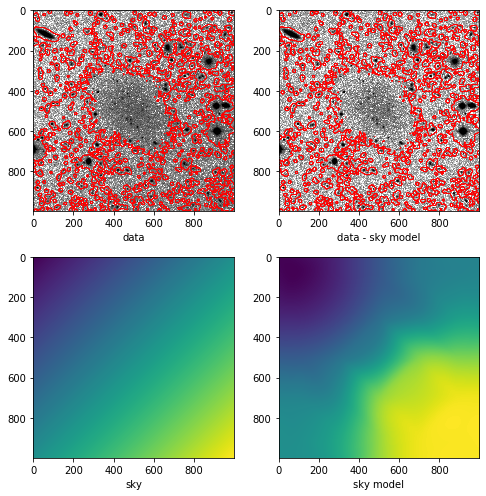

In [13]:
plt.figure(figsize=(7,7))

plt.subplot(2,2,1) 
plt.imshow(SB.Counts2SB(abs(data), ps, mzero), cmap='binary_r', vmax=29, vmin=24) 
plt.contour(mask!=0, colors='r', linewidths=0.5)
plt.xlabel('data')

plt.subplot(2,2,2) 
plt.imshow(SB.Counts2SB(abs(data-sky), ps, mzero), cmap='binary_r', vmax=29, vmin=24)
plt.contour(mask!=0, colors='r', linewidths=0.5)
plt.xlabel('data - sky model')
# ??? when plotting theres a conversion from counts to surface brightness, why?

# our rough sky estimation
plt.subplot(2,2,3)
plt.imshow(sky0) 
plt.xlabel('sky')

# what we got from the skymap function
plt.subplot(2,2,4)
plt.imshow(sky)
plt.xlabel('sky model')
plt.tight_layout()

plt.show()

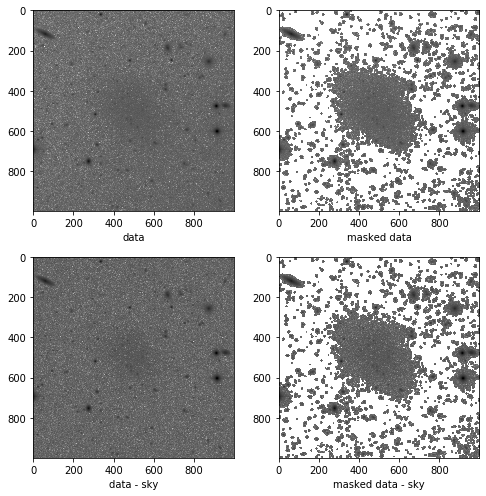

In [61]:
# don't know if this highlights any kind of difference but it was nice to look at the mask being used on the data

plt.figure(figsize=(7,7))

plt.subplot(2,2,1)
plt.imshow(SB.Counts2SB(abs(data), ps, mzero), cmap='binary_r')
plt.xlabel('data')

plt.subplot(2,2,2)
plt.imshow(SB.Counts2SB(abs(data*mask), ps, mzero), cmap='binary_r')
plt.xlabel('masked data')

plt.subplot(2,2,3)
plt.imshow(SB.Counts2SB(abs(data-sky), ps, mzero), cmap='binary_r')
plt.xlabel('data - sky')

plt.subplot(2,2,4)
plt.imshow(SB.Counts2SB(abs((data-sky)*mask), ps, mzero), cmap='binary_r')
plt.xlabel('masked data - sky')
plt.tight_layout()

plt.show()

### example_masking.py

The pipeline demonstrade here is the following:
- sky/rms estimates: meshgrid + interpolation with iterative DBSCAN masking
- source masking using SExtractor (with default settings)
- DBSCAN source detection

(the next example will show an approach that doesn't require the use of a mask)

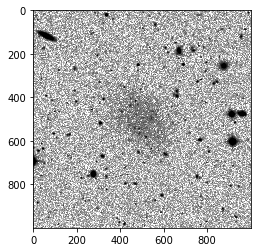

In [1]:
import numpy as numpy
import matplotlib.pyplot as plt
from deepscan import skymap, sextractor, dbscan, SB, geometry, remote_data

ps = 0.186 
mzero = 30 

data = remote_data.get()
plt.imshow(SB.Counts2SB(abs(data), ps, mzero), cmap='binary_r', vmax=29, vmin=24)

In [2]:
# measuring the sky and its RMS
sky, rms = skymap.skymap(data, meshsize=200, medfiltsize=3, nits=3, verbose=True)

skymap: measuring sky...
-Performing interpolation.
skymap: finished after 1 seconds.


In [3]:
# use SExtractor to make a mask using sersic profiling
mask = sextractor.get_mask(data, uiso=29, ps=ps, mzero=mzero, nfix=None)
# uiso = isophotal surface brightness for ellipse radii; nfix = option to fix sersic index (higher values = larger masks)

plt.contour(mask!=0, colors='b', linewidths=0.3)

# ??? WEIRD ERROR
# i tried changing the directory and even creating a directory or folder of the same name but i can't seem to find a reason why this is happening
# maybe cuz i'm using conda interpreter?
# when looking at sextractor.py the part where the error arises is related to creating a temporary directory, maybe for some reaosn i cant create dirs?

get_ellipses: running sextractor...


FileNotFoundError: [Errno 2] No such file or directory: 'sex': 'sex'

In [10]:
import os
here = os.getcwd()
test = "oi"
os.mkdir(os.path.join(here, test))
os.listdir()

# new dir was created without a problem, don't know the reason for the error, i followed the example in github exactly

['deepscan_test.ipynb',
 '.ipynb_checkpoints',
 'testimage1.fits',
 'oi',
 'exp.py']

In [ ]:
# the paper says that SExtractor is not that good at identifying LSB light, so i guess this problem here isn't that bad(?)
# REST OF THE CODE:


#Run the DBSCAN algorithm to produce a Clustered object (C). This class has
#many attributes such as the segmentation maps. 

#'eps' is the clustering radius in pixels. kappa is the confidence parameter
#determined from the thresh and the rms. 

#The automatic minpts derivation using kappa, rms and thresh can be overridden
#by specifying the mpts keyword argument.

C = dbscan.DBSCAN(data, eps=5/ps, kappa=30, thresh=1, verbose=True,
                  mask=mask, sky=sky, rms=rms, mpts=None)
#segmap contour
plt.contour(C.segmap!=0, colors='lawngreen', linewidths=0.5) 
plt.contour(C.segmap_dilate!=0, colors='deepskyblue', linewidths=0.5) 

#==============================================================================

#Use DeepScan's Ellipse class do draw the 1 Re ellipse
e0 = geometry.Ellipse(x0=500, y0=500, theta=3*np.pi/4, q=0.7, a=30/ps)
e0.draw(color='r', linewidth=1, zorder=1, linestyle='--')

plt.show()

### example_deblending.py

The pipeline demonstrated here is:
- sky / rms estimates: meshgrid + interpolation with iteritive DBSCAN masking
- DBSCAN source detection (no SExtractor masking!!)
- de-blending of DBSCAN detections, avoiding fragmentation of LSB structure
- creation of source catalogue


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from deepscan import skymap, dbscan, SB, remote_data, deblend, makecat, geometry

# loading data and setting observational stuff
ps = 0.186
mzero = 30

data = remote_data.get() 

In [3]:
# measuring the sky
sky, rms = skymap.skymap(data, meshsize=200, medfiltsize=3, nits=3, verbose=True)

skymap: measuring sky...
-Performing interpolation.
skymap: finished after 1 seconds.


In [4]:
# performing the detection through DBSCAN, outputs a clustered object (C); this class has attributes such as segmentation maps
C = dbscan.DBSCAN(data, eps=5, kappa=5, thresh=0.5, verbose=True, mask=None, sky=sky, rms=rms)

# input parameters:
"""
data : 2D float array = Input data 
    
eps: float = Clustering radius in pixels.

mpts : float = DBSCAN min points parameter. Leave as None to calculate using kappa.

kappa : float = Statistical significance parameter. Only used if mpts is None.
    
thresh : float = Detection threshold [SNR].
        
mask_type : string = 'rms' or 'zeros': How should the mask be applied? / if mask is set to None we don't apply anything
        
use_fft : bool = Use FFT convolution instead of direct?
"""

# returns:
"""
class Clustered():
    '''
    Class to house DBSCAN detections.
    '''
    def __init__(self, corepoints, segmap, segmap_dilate, sources,
                 t_dbscan=None, kernel=None):
        '''
        Parameters
        ----------
        
        '''
        self.corepoints = corepoints
        self.segmap = segmap
        self.sources = sources
        self.segmap_dilate = segmap_dilate
        self.t_dbscan=t_dbscan
        self.kernel = kernel
""";

dbscan: performing clustering...
-threshold applied in 0 seconds
-corepoints obtained in 0 seconds
-dilated segments obtained in 0 seconds.
-segments labeled in 0 seconds.
-segmap eroded in 0 seconds
dbscan: finished after 0 seconds.


In [5]:
# how it works:
"""
#Apply the mask
if mask is not None:
    if mask_type == 'rms':
        data = masking.apply_mask(data, mask=mask, rms=rms, sky=sky)
    elif mask_type == 'zeros':
        data = masking.apply_mask(data, mask=mask, fillval=0)
    else:
        print('WARNING: mask_type not recongnised - ignoring mask.')
    
#Unit conversions
data = (data-sky)/rms  #[SNR]
    
#Calculate minpoints
if mpts is None:
    mpts = minpts.estimate_minpts(eps=eps, kappa=kappa, tmin=thresh, rms=1)
            
#DBSCAN clustering
if verbose: 
    print('dbscan: performing clustering...')
        
if use_fft:
    C = _DBSCAN_fft(data, thresh=thresh, eps=eps, mpts=mpts, verbose=verbose, *args, **kwargs)
    
else:
    C = _DBSCAN(data, thresh=thresh, eps=eps, mpts=mpts, verbose=verbose, *args, **kwargs)
    
if verbose: 
    print('dbscan: finished after %i seconds.' % (time.time()-t0))
    
return C
""";

In [6]:
# perform deblending to return update segmap and the source list

bmap = C.segmap !=0 # use the segmap produced by DBSCAN for deblending

segmap, segments = deblend.deblend(data, bmap, rms, contrast=0.5, minarea=5, Nthresh=25, smooth=1, sky=sky, expand=5, verbose=True) 
# how deblend works: (??? i didn't get how this works to be honest :v); ; check https://github.com/danjampro/DeepScan/blob/master/deepscan/deblend.py

deblend: deblending...
-Final number of segments: 709
deblend: finished after 0 seconds.


In [7]:
# make a catalogue with the data, segmap and sources (segments); check https://github.com/danjampro/DeepScan/blob/master/deepscan/makecat.py
df = makecat.MakeCat(data, segmap, segments, sky=sky, ps=ps, magzero=mzero) # pandas DataFrame
df # by checking the github page we can see the info that's made available on each column

makecat: performing measurements...
makecat: finished after 0 seconds.


,a_rms,b_rms,theta,q,xcen,ycen,segID,flux,area,I50,I50av,R50,parentID,mag,SB50av,SB50
0,1.717375,1.158021,1.850166,0.674297,82.281074,6.416420,1.0,69.504435,60.0,1.845048,2.794010,0.378364,0.0,-4.605031,25.231995,25.682546
1,1.782082,1.656549,2.780545,0.929558,856.456012,3.680821,2.0,45.597769,56.0,1.350224,1.663673,0.392647,0.0,-4.147359,25.794895,26.021551
2,2.941962,1.313173,1.635913,0.446360,909.321340,1.342669,3.0,32.977434,54.0,1.123848,1.443776,0.363520,0.0,-3.795542,25.948815,26.220796
3,3.526186,2.928425,1.789789,0.830479,989.162401,11.788163,4.0,435.248309,267.0,3.414455,5.898345,0.638321,0.0,-6.596843,24.420739,25.014261
4,0.288675,0.288675,1.570796,1.000000,377.000000,4.000000,5.0,0.402086,1.0,0.402086,0.402086,0.104939,0.0,0.989203,27.336768,27.336768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,5.527005,2.653881,1.796838,0.480166,445.252744,527.198244,19128.0,345.088929,235.0,1.715523,2.855205,0.819602,9782.0,-6.344828,25.208471,25.761573
705,2.828639,2.384312,-2.663115,0.842918,43.367151,602.371884,20068.0,92.832054,127.0,1.361428,1.745488,0.545280,12308.0,-4.919245,25.742773,26.012578
706,3.257032,2.524810,-2.145468,0.775187,232.275068,765.349607,20243.0,148.295908,169.0,1.593297,2.521589,0.574776,13514.0,-5.427823,25.343379,25.841823
707,1.233281,0.847517,2.397968,0.687205,904.420954,940.101448,20909.0,19.375258,42.0,1.167926,1.420808,0.277643,15885.0,-3.218119,25.966227,26.179026


In [25]:
# making plots
plt.figure(figsize=(12,4)) 

#Raw data
plt.subplot(1,3,1) 
plt.imshow(SB.Counts2SB(abs(data), ps, mzero), cmap='binary_r', vmax=28, vmin=23)

#Contour plot
plt.subplot(1,3,2) 
plt.imshow(SB.Counts2SB(abs(data), ps, mzero), cmap='binary_r', vmax=28, vmin=23)
plt.contour(segmap,levels = np.unique(segmap[segmap>0]), colors=('r',), linestyles=('-',), linewidths=(0.2,))  

#Ellipse plot (R50)
plt.subplot(1,3,3)
plt.imshow(SB.Counts2SB(abs(data), ps, mzero), cmap='binary_r', vmax=28, vmin=23)

for i in range(df.shape[0]):
    s = df.iloc[i]
    E = geometry.Ellipse(x0=s['xcen'], y0=s['ycen'], a=s['R50']/ps, q=s['q'], theta=s['theta'])
    E.draw(color='b', linewidth=0.5, ax=plt.gca())

plt.gca().set_xlim(0, data.shape[1])
plt.gca().set_ylim(data.shape[0], 0)

plt.tight_layout()
plt.show()

# COULDN'T MAKE THE PLOTS (apparently too much for my pc), but they're available on github

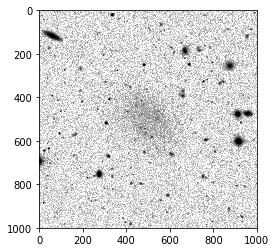

In [27]:
# attempt to remove the sources from plot
# raw data
fig, ax = plt.subplots()

plt.imshow(SB.Counts2SB(abs(data), ps, mzero), cmap='binary_r', vmax=28, vmin=23)
ax.set_xlim(0, data.shape[1])
ax.set_ylim(data.shape[0], 0)

plt.show()

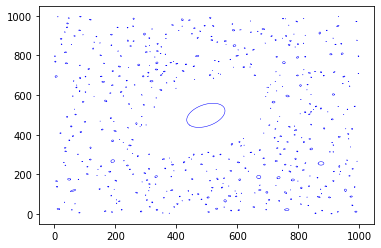

In [29]:
# only ellipses plot
for i in range(0,500):#df.shape[0]):
    s = df.iloc[i]
    E = geometry.Ellipse(x0=s['xcen'], y0=s['ycen'], a=s['R50']/ps, q=s['q'], theta=s['theta'])
    E.draw(color='b', linewidth=0.5, ax=plt.gca())

# ??? should i find a way to subtract these ellipses from the raw data?
# the library used to make them is called "shapely", but i can't find a way of using these ellipses in matplotlib in order to change the image


### Looking inside the DeepScan function: (that we used on example_basic.py):
```python3
# input = data

# Measure the sky and its RMS
sky, rms = skymap.skymap(data=data, verbose=verbose, **kwargs_skymap)
    
# Subtract the sky (this makes a new copy of data)
data = data-sky
                             
# Run DBSCAN to identify initial clusters
C = dbscan.DBSCAN(data=data, rms=rms, verbose=verbose, **kwargs_dbscan)

# Deblend the segmap produced by DBSCAN 
segmap_ = C.segmap_dilate if dilate else C.segmap
segmap, segments = deblend.deblend(data=data, bmap=segmap_, rms=rms, verbose=verbose, **kwargs_deblend)

df = makecat.MakeCat(data=data, segmap=segmap, segments=segments, verbose=verbose, **kwargs_makecat)
    
return {'df':df, 'segmap':segmap, 'sky':sky, 'rms':rms}
```